In [1]:
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
import pandas as pd # remove when finished

In [2]:
data_path = 'data/train.csv'

In [3]:
# label, features, ids = load_csv_data(data_path, sub_sample=True)

In [4]:
data = pd.read_csv(data_path)
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
features = data.columns.drop(['Id','Prediction'])
features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [54]:
def hist_for_feature(data,dataCol):
    data1 = data.loc[(data[dataCol]!=-999)].copy()
    data1_s = data1.loc[(data.Prediction=='s')].copy()
    data1_b = data1.loc[(data.Prediction=='b')].copy()

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
    hist_range = (min(data1_s[dataCol]),max(data1_s[dataCol]))
    ax1.hist(data1_s[dataCol],log=False,range = hist_range,color = '#e0f3db')
    ax1.set_title(dataCol+'_s')
    ax2.hist(data1_b[dataCol],log=False,range = hist_range, color = '#999999')
    ax2.set_title(dataCol+'_b')
    plt.savefig('image/hist_notlog/'+dataCol+'.jpg')
    del ax1,ax2
    plt.close('all')

In [55]:
for feature in features:
    hist_for_feature(data,feature)

In [50]:
features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

Text(0.5,1,'DER_mass_MMC_b')

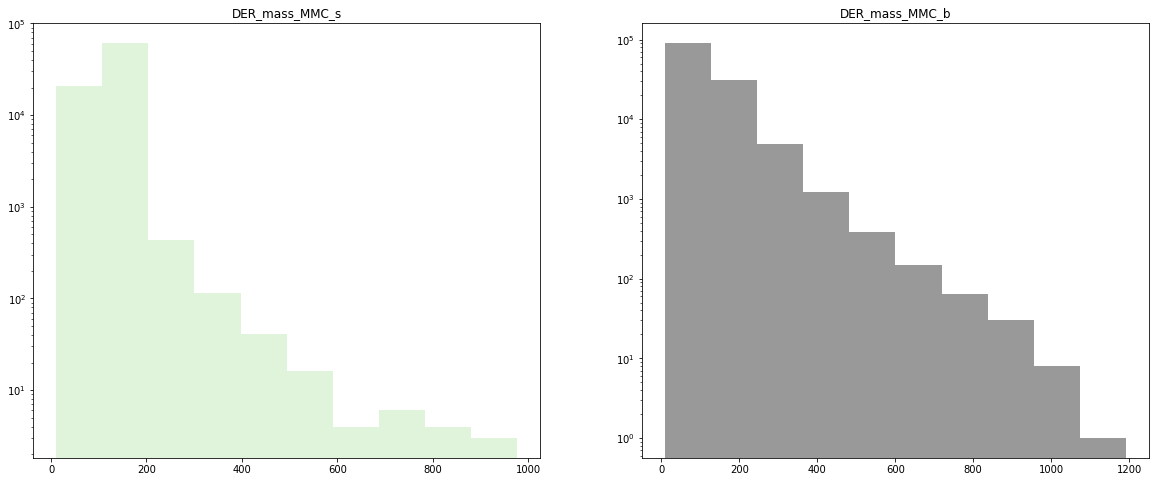

In [51]:
dataCol = 'DER_mass_MMC'
data1 = data.loc[(data[dataCol]!=-999)].copy()
data1_s = data1.loc[(data.Prediction=='s')].copy()
data1_b = data1.loc[(data.Prediction=='b')].copy()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 8))
hist_range = (min(data1_s[dataCol]),max(data1_s[dataCol]))
ax1.hist(data1_s[dataCol],log=True,color = '#e0f3db')
ax1.set_title(dataCol+'_s')
ax2.hist(data1_b[dataCol],log=True,color = '#999999')
ax2.set_title(dataCol+'_b')
# plt.savefig('image/hist_signal/'+dataCol+'.jpg')


In [68]:
label = data.Prediction.copy()
label = label.replace(['s','b'],[1,-1])
label.dtype

dtype('int64')

In [69]:
missing_ratio

NameError: name 'missing_ratio' is not defined

In [150]:
def missing_rate(data,features):
    df_ = pd.DataFrame({'idx':[np.nan]})
    for feature in features:
        data2 = data.loc[(data[feature]==-999)].copy()
        missing_rate = data2[feature].size/data[dataCol].size
        df1 = pd.DataFrame({feature:[missing_rate]})
        df_ = pd.concat([df_,df1],axis=1)
    df_ = df_.drop(columns='idx')
    df_ = df_.T.rename(columns={0:'rate'})
    return df_

In [195]:
df_miss = missing_rate(data,features)
df_miss

,rate
DER_mass_MMC,0.152456
DER_mass_transverse_met_lep,0.000000
DER_mass_vis,0.000000
DER_pt_h,0.000000
DER_deltaeta_jet_jet,0.709828
DER_mass_jet_jet,0.709828
DER_prodeta_jet_jet,0.709828
DER_deltar_tau_lep,0.000000
DER_pt_tot,0.000000
DER_sum_pt,0.000000


In [193]:
names = df_miss.loc[df_miss.rate==0.709828].index
# data[list(names)].head()
data_drop = data.drop(columns = list(names))
#data_drop.head()
names

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'],
      dtype='object')

In [192]:
names = df_miss.loc[df_miss.rate==0.399652].index
# data_drop.drop(columns = list(names)).head()
data_drop[names]

,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi
0,67.435,2.150,0.444
1,46.226,0.725,1.158
2,44.251,2.053,-2.028
3,-999.000,-999.000,-999.000
4,-999.000,-999.000,-999.000
5,90.547,-2.412,-0.653
6,123.010,0.864,1.450
7,30.638,-0.715,-1.724
8,-999.000,-999.000,-999.000
9,167.735,-2.767,-2.514


In [194]:
# 缺失值处理
# 用对应label的均值代替？引入了噪音；用其他变量做预测模型估计？不好找相关性；